## Análise exploratória com dados do setor elétrico ##

In [1]:
# Importando as bibliotecas que serão utilizadas na análise

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importando o dataset em formato XML do site utilizando o pandas

enel = pd.read_xml("https://dadosabertos.aneel.gov.br/dataset/46811af6-73da-44cd-93af-3f41f979a609/resource/eb50e422-4f64-47c8-844e-acdacf89d503/download/tarifamediafornecimento.xml")
enel.head(100)

,ideTarifaMediaFornecimento,nomClasseConsumo,nomRegiao,vlrConsumoMWh,mesReferencia,anoReferencia,dthProcessamento
0,1,Comercial e Serviços e Outras,Brasil,434.27,12,2016,13/09/2017 00:00:00
1,2,Comercial e Serviços e Outras,Brasil,449.36,9,2016,13/09/2017 00:00:00
2,3,Comercial e Serviços e Outras,Centro-Oeste,452.17,12,2016,13/09/2017 00:00:00
3,4,Comercial e Serviços e Outras,Centro-Oeste,535.42,9,2016,13/09/2017 00:00:00
4,5,Comercial e Serviços e Outras,Nordeste,415.44,12,2016,13/09/2017 00:00:00
...,...,...,...,...,...,...,...
95,96,"Comercial, Serviços e Outras",Sudeste,420.78,12,2015,13/09/2017 00:00:00
96,97,"Comercial, Serviços e Outras",Sudeste,460.37,3,2003,13/09/2017 00:00:00
97,98,"Comercial, Serviços e Outras",Sudeste,290.13,3,2012,13/09/2017 00:00:00
98,99,"Comercial, Serviços e Outras",Sudeste,161.39,3,2013,13/09/2017 00:00:00


In [4]:
# Entendendo o tamanho do dataset e os tipos de dados de cada coluna

enel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ideTarifaMediaFornecimento  2229 non-null   int64  
 1   nomClasseConsumo            2229 non-null   object 
 2   nomRegiao                   2229 non-null   object 
 3   vlrConsumoMWh               2227 non-null   float64
 4   mesReferencia               2229 non-null   int64  
 5   anoReferencia               2229 non-null   int64  
 6   dthProcessamento            2229 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 122.0+ KB


<AxesSubplot:>

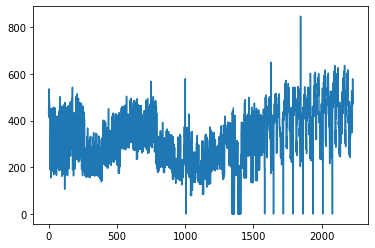

In [5]:
# Verificando a presença de outliers
# Aqui pude indentificar a existência de outliers e agora vou tratar eles

enel['vlrConsumoMWh'].plot()

In [6]:
# Maior outlier:

enel['vlrConsumoMWh'].max()

846.84

In [7]:
# Menor outlier:

enel['vlrConsumoMWh'].min()

0.0

In [8]:
media = enel['vlrConsumoMWh'].mean()

In [9]:
# Alterei os outliers com valor igual a zero ou bem próximo, que é o caso do 0.42,
# pelo valor da média dos valores do consumo, para trazer um equilíbrio aos valores do dataset 

enel['vlrConsumoMWh'] = enel["vlrConsumoMWh"].replace([0,0.42],media)

In [10]:
enel['vlrConsumoMWh'].min()

78.68

In [11]:
# Não alterei o outro outlier porque foi realmente registrado
enel.max()

ideTarifaMediaFornecimento                   2300
nomClasseConsumo                 Total por Região
nomRegiao                                     Sul
vlrConsumoMWh                              846.84
mesReferencia                                  12
anoReferencia                                2019
dthProcessamento              30/09/2019 00:00:00
dtype: object

<AxesSubplot:>

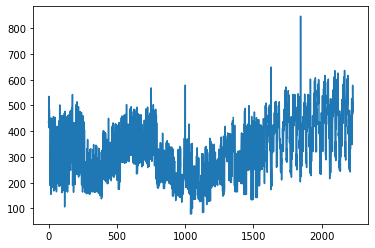

In [12]:
# Aqui estão nossos valores registrados depois de tratar os outliers
enel['vlrConsumoMWh'].plot()

In [13]:
# Preenchendo os dois valores que estavam vazios na coluna de valor do consumo por MW/h com a média de valor de consumo

enel['vlrConsumoMWh'] = enel['vlrConsumoMWh'].fillna(enel['vlrConsumoMWh'].mean)
enel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ideTarifaMediaFornecimento  2229 non-null   int64 
 1   nomClasseConsumo            2229 non-null   object
 2   nomRegiao                   2229 non-null   object
 3   vlrConsumoMWh               2229 non-null   object
 4   mesReferencia               2229 non-null   int64 
 5   anoReferencia               2229 non-null   int64 
 6   dthProcessamento            2229 non-null   object
dtypes: int64(3), object(4)
memory usage: 122.0+ KB


In [14]:
enel['vlrConsumoMWh'] = pd.to_numeric(enel['vlrConsumoMWh'],errors = 'coerce')

In [15]:
enel[['anoReferencia','mesReferencia','ideTarifaMediaFornecimento']] = enel[['anoReferencia','mesReferencia',
                                                                             'ideTarifaMediaFornecimento']].astype(str)

In [16]:
# Média de valor de consumo em MW/h por cada região

enel_gp = enel[["nomRegiao","vlrConsumoMWh"]].groupby('nomRegiao').mean()
display(enel_gp)


,vlrConsumoMWh
nomRegiao,
Brasil,318.220324
Centro-Oeste,339.970465
Nordeste,298.990833
Norte,353.819238
Sudeste,333.651478
Sul,313.901839


In [17]:
enel_filtrada = enel[["nomRegiao","vlrConsumoMWh"]].query('nomRegiao != "Brasil"').groupby(enel['nomRegiao']).mean()
display(enel_filtrada)

,vlrConsumoMWh
nomRegiao,
Centro-Oeste,339.970465
Nordeste,298.990833
Norte,353.819238
Sudeste,333.651478
Sul,313.901839


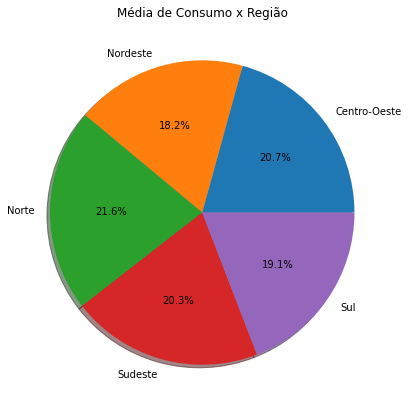

In [18]:
# Fazendo a análise do gráfico abaixo, temos como informação que a média de valor de consumo nas regiões do país varia pouco

fil = enel_filtrada['vlrConsumoMWh']
labels = ['Centro-Oeste','Nordeste','Norte','Sudeste','Sul']

plt.figure(figsize=(7,7))
plt.title('Média de Consumo x Região')
plt.pie(x=fil,labels=labels,autopct='%1.1f%%', shadow=True)
plt.show()

In [19]:
# Valor médio de consumo de MW/h por ano 

ano_vlr = enel[["anoReferencia","vlrConsumoMWh"]].groupby(enel['anoReferencia']).mean()
display(ano_vlr)

,vlrConsumoMWh
anoReferencia,
2003,371.572976
2012,253.224161
2013,224.143685
2014,232.417822
2015,325.803393
2016,372.710873
2017,386.375499
2018,422.146052
2019,442.923662


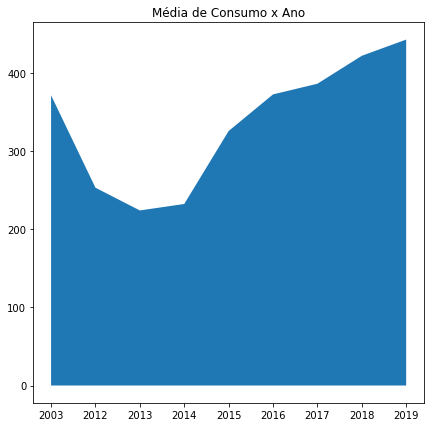

In [20]:
# Pode se tirar de informação desse gráfico que desde 2012 a média de valor de consumo está aumentando

area_y = ano_vlr['vlrConsumoMWh']
area_x = enel['anoReferencia']
area_x = np.unique(area_x)

plt.figure(figsize=(7,7))
plt.title('Média de Consumo x Ano')
plt.fill_between(area_x,area_y)

plt.show()

In [21]:
# Média de valor de consumo por cada classe
# Aqui, pude ver que havia algumas categorias que eram as mesmas, porém, como havia uma diferença na digitação delas,
# o programa entendeu como se fossem diferentes

classe_filtro = enel[["nomClasseConsumo","vlrConsumoMWh"]].groupby('nomClasseConsumo').mean()
display(classe_filtro)

,vlrConsumoMWh
nomClasseConsumo,
Comercial e Serviços e Outras,504.803261
Comercial e Serviços e Outras,448.585833
"Comercial, Serviços e Outras",323.939841
Consumo Próprio,389.480161
Iluminação Pública,245.860699
Industrial,337.372043
Poder Público,401.276452
Residencia,338.312222
Residencial,438.512193


In [22]:
# Neste código, alterei os nomes que estavam repetitivos e consertei as categorias

enel['nomClasseConsumo'] = enel['nomClasseConsumo'].replace(['Totais por Região'],'Total por Região')
enel['nomClasseConsumo'] = enel['nomClasseConsumo'].replace(['Serviço Público (água e esgoto e saneamento)'],'Serviço Público (água, esgoto e saneamento)')
enel['nomClasseConsumo'] = enel['nomClasseConsumo'].replace(['Serviço Público (água e  esgoto e saneamento)'],'Serviço Público (água, esgoto e saneamento)')
enel['nomClasseConsumo'] = enel['nomClasseConsumo'].replace(['Total por Região' 'Comercial e  Serviços e Outras'],'Serviço Público (água, esgoto e saneamento)')
enel['nomClasseConsumo'] = enel['nomClasseConsumo'].replace(['Residencia'],'Residencial')
enel['nomClasseConsumo'] = enel['nomClasseConsumo'].replace(['Comercial e Serviços e Outras'],'Comercial, Serviços e Outras')
enel['nomClasseConsumo'] = enel['nomClasseConsumo'].replace(['Comercial e  Serviços e Outras'],'Comercial, Serviços e Outras')

In [23]:
# Tabela de valor de consumo por MW/h corrigida

classe_filtro = enel[["nomClasseConsumo","vlrConsumoMWh"]].groupby('nomClasseConsumo').mean()
display(classe_filtro)

,vlrConsumoMWh
nomClasseConsumo,
"Comercial, Serviços e Outras",377.284783
Consumo Próprio,389.480161
Iluminação Pública,245.860699
Industrial,337.372043
Poder Público,401.276452
Residencial,399.725108
Rural,290.290430
Rural Aquicultor,255.219915
Rural Irrigante,244.985161


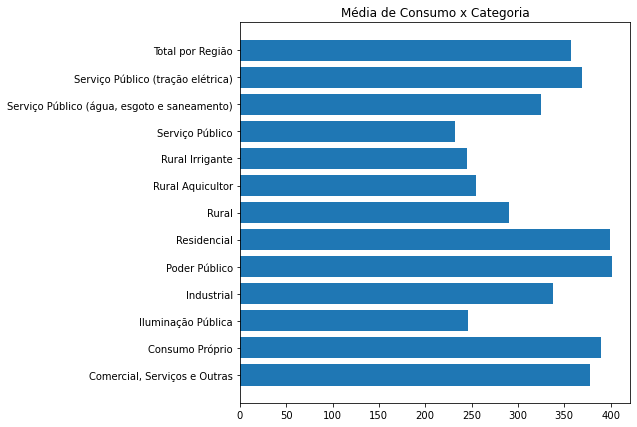

In [24]:
# Com este último gráfico, pode se analisar que as maiores médias são do Poder Público e Residencial, enquanto as menores
# são da iluminação pública e do serviço público

larg = classe_filtro['vlrConsumoMWh']
categorias = enel['nomClasseConsumo'].unique()

plt.figure(figsize=(7,7))
plt.title('Média de Consumo x Categoria')
plt.barh(categorias,larg)

plt.show()